<a href="https://colab.research.google.com/github/jairbenavides0520-dotcom/Jair/blob/main/Actividades%20IA/AF8_Redes_Neuronales_Convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Martes N4-N6**

Miembros de equipo:

Jesus Román Aguirre Hernandez 2053240

Jair Eduardo Benavides García 2052989

Sarahi Montserrat Barba Botello 204150

Raúl Alejandro Garza Elizondo 2066224

**Explicacion de la actividad**


---



El código implementa una red neuronal convolucional (CNN) para clasificar


imágenes del conjunto de datos MNIST, que contiene dígitos manuscritos del 0 al 9.
Primero se cargan y preprocesan los datos, normalizando los valores de los píxeles y ajustando las dimensiones de las imágenes para adaptarlas al modelo.

La red se construye con capas convolucionales y de pooling para extraer características, seguidas de capas densas para realizar la clasificación final mediante softmax.
Se utiliza el optimizador Adam y la función de pérdida Sparse Categorical Crossentropy, evaluando el desempeño con la exactitud (accuracy).

Finalmente, se entrena, evalúa y prueban las predicciones del modelo sobre imágenes de prueba, mostrando tanto los valores reales como las predicciones para analizar su rendimiento.

In [ ]:
#1.Cargar librerías
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#2.Cargar datos
(train_data, train_labels), (test_data, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Se añadio dimensión de canal para compatibilidad
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data  = test_data.reshape((test_data.shape[0], 28, 28, 1))


In [ ]:
#Nombres de las clases (0-9 dígitos)
class_names = [str(i) for i in range(10)]

In [ ]:
# 3.Preprocesamiento de datos
# Normalizar a rango [0,1]
train_data = train_data.astype('float32') / 255.0
test_data  = test_data.astype('float32')  / 255.0

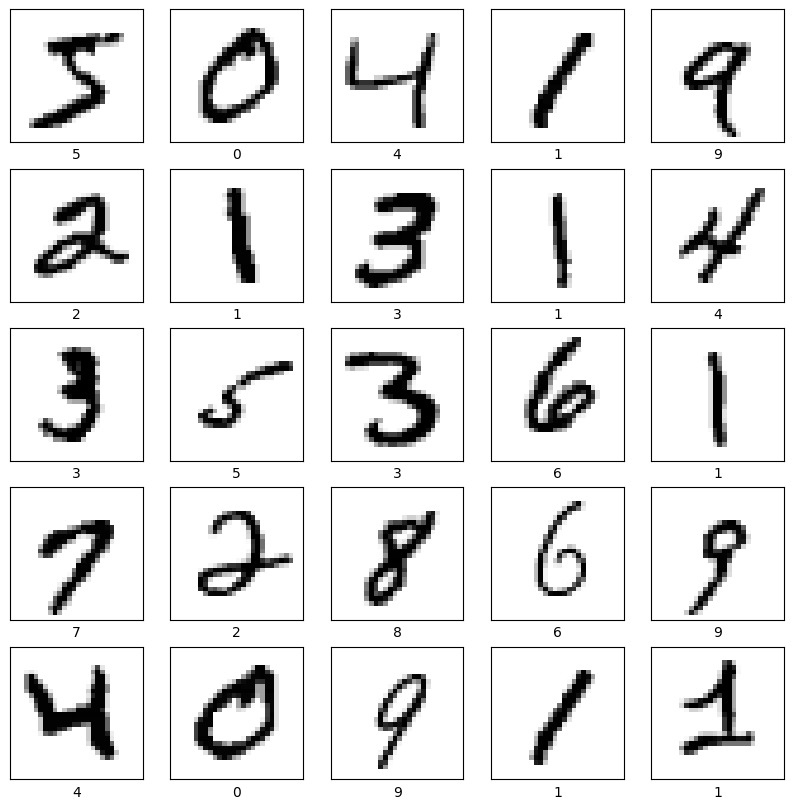

In [ ]:
#Mostrar algunas imágenes de entrenamiento
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#4. Selección y entrenamiento del modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
epochs = 10
history = model.fit(train_data, train_labels, epochs=epochs,
                    validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.9006 - loss: 0.3178 - val_accuracy: 0.9870 - val_loss: 0.0424
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9868 - loss: 0.0416 - val_accuracy: 0.9907 - val_loss: 0.0321
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9906 - loss: 0.0298 - val_accuracy: 0.9907 - val_loss: 0.0291
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9932 - loss: 0.0223 - val_accuracy: 0.9922 - val_loss: 0.0231
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9940 - loss: 0.0185 - val_accuracy: 0.9922 - val_loss: 0.0244
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9960 - loss: 0.0123 - val_accuracy: 0.9901 - val_loss: 0.0286
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9964 - loss: 0.0117 - val_accuracy: 0.9907 - val_loss: 0.0359
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9967 -

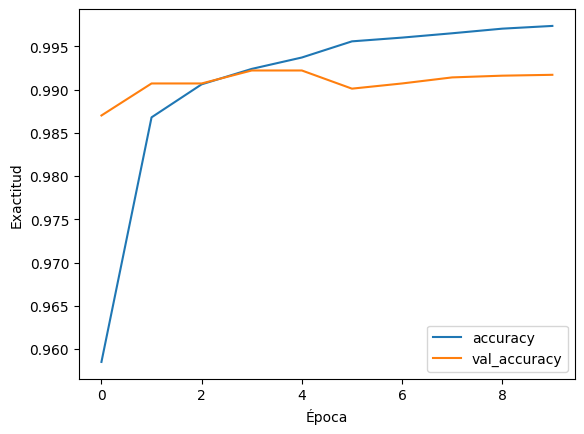

In [ ]:
#Graficar exactitud
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#5.Prueba del modelo
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f"\nExactitud del modelo en datos de prueba: {test_acc:.4f}")

313/313 - 4s - 12ms/step - accuracy: 0.9917 - loss: 0.0344

Exactitud del modelo en datos de prueba: 0.9917


In [ ]:
#Evaluacion con porcentaje
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print("\nExactitud en datos de prueba: {:.2f}%".format(test_acc * 100))

313/313 - 3s - 11ms/step - accuracy: 0.9917 - loss: 0.0344

Exactitud en datos de prueba: 99.17%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


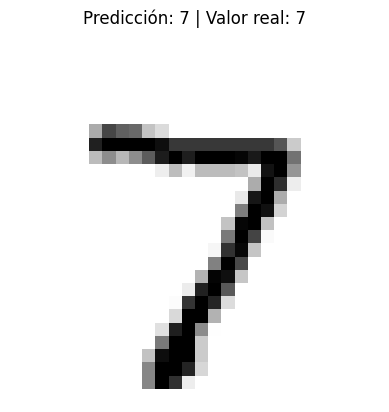

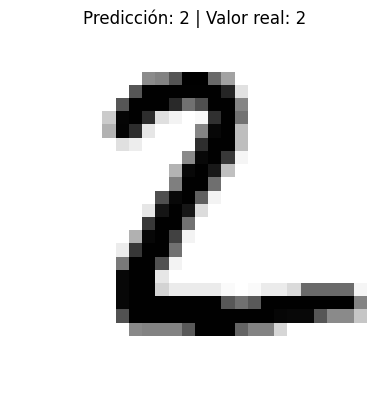

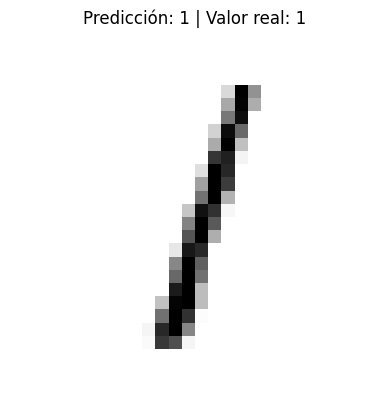

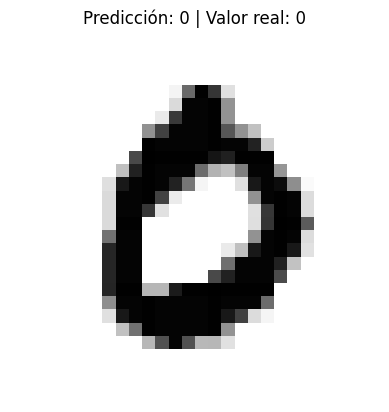

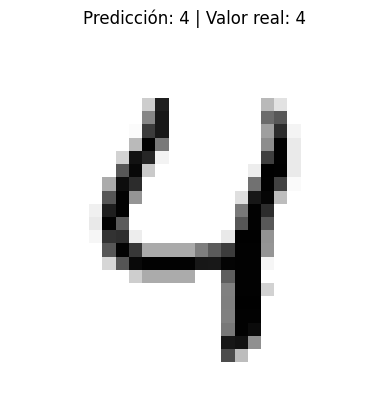

In [ ]:
#Realizar 5 predicciones y mostrar resultados
predictions = model.predict(test_data[:5])
for i in range(5):
    plt.imshow(test_data[i].reshape(28,28), cmap=plt.cm.binary)
    plt.title(f"Predicción: {class_names[np.argmax(predictions[i])]} | Valor real: {class_names[test_labels[i]]}")
    plt.axis('off')
    plt.show()